## Check setup

Let's check which python packages are installed in our virtual environment (this might take a while).

In [1]:
import pip

pip.main(['list'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Package          Version
---------------- -------
backcall         0.1.0
cycler           0.10.0
decorator        4.4.2
ipykernel        5.3.0
ipyparallel      6.3.0
ipython          7.15.0
ipython-genutils 0.2.0
jedi             0.17.0
jupyter-client   6.1.3
jupyter-core     4.6.3
kiwisolver       1.2.0
matplotlib       3.2.1
mpi4py           3.0.3
numpy            1.18.4
parso            0.7.0
pexpect          4.8.0
pickleshare      0.7.5
pip              20.1.1
prompt-toolkit   3.0.5
ptyprocess       0.6.0
Pygments         2.6.1
pyparsing        2.4.7
python-dateutil  2.8.1
pyzmq            19.0.1
setuptools       39.0.1
six              1.15.0
tornado          6.0.4
traitlets        4.3.3
virtualenv-clone 0.5.4
wcwidth          0.2.3
wheel            0.34.2


0

Let's check if numpy and matplotlib are working.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

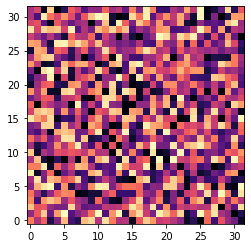

In [6]:
plt.imshow( np.random.rand( 32, 32 ), origin='lower', cmap=plt.get_cmap('magma') );